# Data Exploration

## Load Libraries and Data

In [1]:
import pandas as pd
import numpy as np
import sqlite3
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

plt.style.use('seaborn')
df = pd.read_csv('data/kc_house_data.csv')

# check the columns and first few rows
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


## Explore the Data

In [2]:
# get the total counts and data types for each column
print(df.shape)
print("\n")
df.info()

(21597, 21)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float

In [3]:
# Get descriptions of each column
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21534.000000,21597.000000,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,0.233863,3.409825,7.657915,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.765686,0.650546,1.173200,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [4]:
# look for duplicates
duplicate_rows_df = df[df.duplicated()]
print("Number of duplicates: ", len(duplicate_rows_df))

Number of duplicates:  0


In [5]:
# preview 5 most frequent values of a col in a loop, for each string col.
# looking for extraneous values and getting to know the data
for col in df.columns:
    try:
        print(col, df[col].value_counts()[:5])
    except:
        print(col, df[col].value_counts())
    print('\n')

id 795000620     3
1825069031    2
2019200220    2
7129304540    2
1781500435    2
Name: id, dtype: int64


date 6/23/2014    142
6/26/2014    131
6/25/2014    131
7/8/2014     127
4/27/2015    126
Name: date, dtype: int64


price 350000.0    172
450000.0    172
550000.0    159
500000.0    152
425000.0    150
           ... 
870515.0      1
336950.0      1
386100.0      1
176250.0      1
884744.0      1
Name: price, Length: 3622, dtype: int64


bedrooms 3    9824
4    6882
2    2760
5    1601
6     272
Name: bedrooms, dtype: int64


bathrooms 2.50    5377
1.00    3851
1.75    3048
2.25    2047
2.00    1930
1.50    1445
2.75    1185
3.00     753
3.50     731
3.25     589
3.75     155
4.00     136
4.50     100
4.25      79
0.75      71
4.75      23
5.00      21
Name: bathrooms, dtype: int64


sqft_living 1300    138
1400    135
1440    133
1660    129
1010    129
Name: sqft_living, dtype: int64


sqft_lot 5000    358
6000    290
4000    251
7200    220
7500    119
Name: sqft_lot, dtype: 

In [6]:
# replace extraneous value '?' in 'sqft_basement' col to equal 0 as that is mode
# convert to type to float
df.sqft_basement = df.sqft_basement.map(lambda x: '0' if x == '?' else x)
df.sqft_basement = df.sqft_basement.astype('float')

In [7]:
# see results
df.sqft_basement.value_counts()

0.0       13280
600.0       217
500.0       209
700.0       208
800.0       201
          ...  
915.0         1
295.0         1
1281.0        1
2130.0        1
906.0         1
Name: sqft_basement, Length: 303, dtype: int64

In [8]:
# check for null values
df.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

## Scrub the Data

In [9]:
# analyze waterfront column
print(df['waterfront'].value_counts())

0.0    19075
1.0      146
Name: waterfront, dtype: int64


In [10]:
# values are either yes (1.0) or no (0.0)
# since the cells are blank, it is best to assume that the houses do not have a waterfront view
# the empty cells should be filled with 0.0
df['waterfront'].fillna(0, inplace=True)
print(df.isnull().sum())

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront          0
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64


In [11]:
# how much is missing from year renovated - 18%
# printed most common values so that we know what to replace the nulls with
print('Percentage of Null yr_renovated Values:', len(df[df.yr_renovated.isna()])/ len(df))
print('Number of Unique yr_renovated Values:', df.yr_renovated.nunique())
print('Number of Unique Values:', df.yr_renovated.value_counts())

Percentage of Null yr_renovated Values: 0.17789507802009538
Number of Unique yr_renovated Values: 70
Number of Unique Values: 0.0       17011
2014.0       73
2003.0       31
2013.0       31
2007.0       30
          ...  
1946.0        1
1959.0        1
1971.0        1
1951.0        1
1954.0        1
Name: yr_renovated, Length: 70, dtype: int64


In [12]:
# 0.0 is the mode
# a number equals the year the home was renovated and 0.0 means the home was never renovated
# we should then also assume that the blank cells mean that these homes were never renovated
# convert nan to 0.0
df.loc[df.yr_renovated.isna(), 'yr_renovated'] = 0.0

In [13]:
# see results
df.yr_renovated.value_counts()

0.0       20853
2014.0       73
2003.0       31
2013.0       31
2007.0       30
          ...  
1946.0        1
1959.0        1
1971.0        1
1951.0        1
1954.0        1
Name: yr_renovated, Length: 70, dtype: int64

In [14]:
# analyze view column
print(df['view'].value_counts())

0.0    19422
2.0      957
3.0      508
1.0      330
4.0      317
Name: view, dtype: int64


In [15]:
views_mean = df['view'].mean()
views_median = df['view'].median()
views_mode = df['view'].mode()
print('Viewed Mean: ', views_mean)
print('Viewed Median: ', views_median)
print('Viewed Mode: ', views_mode)

Viewed Mean:  0.23386272870808952
Viewed Median:  0.0
Viewed Mode:  0    0.0
dtype: float64


In [16]:
# both the median and mode are 0.0
# the mean rounded to the nearest whole number is also 0.0
# it is best to assume the cells were left blank because they were not viewed
# the blank num_views cells should be changed to 0.0
df['view'] = df['view'].fillna(0.0)
print(df['view'].value_counts())

0.0    19485
2.0      957
3.0      508
1.0      330
4.0      317
Name: view, dtype: int64


In [17]:
print(df.isnull().sum())

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64


In [18]:
# see if all null values are filled
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     21597 non-null  float64
 9   view           21597 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  float64
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   21597 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [19]:
# Converting date to datetime
df.date = pd.to_datetime(df.date)

## EDA with Visualizations

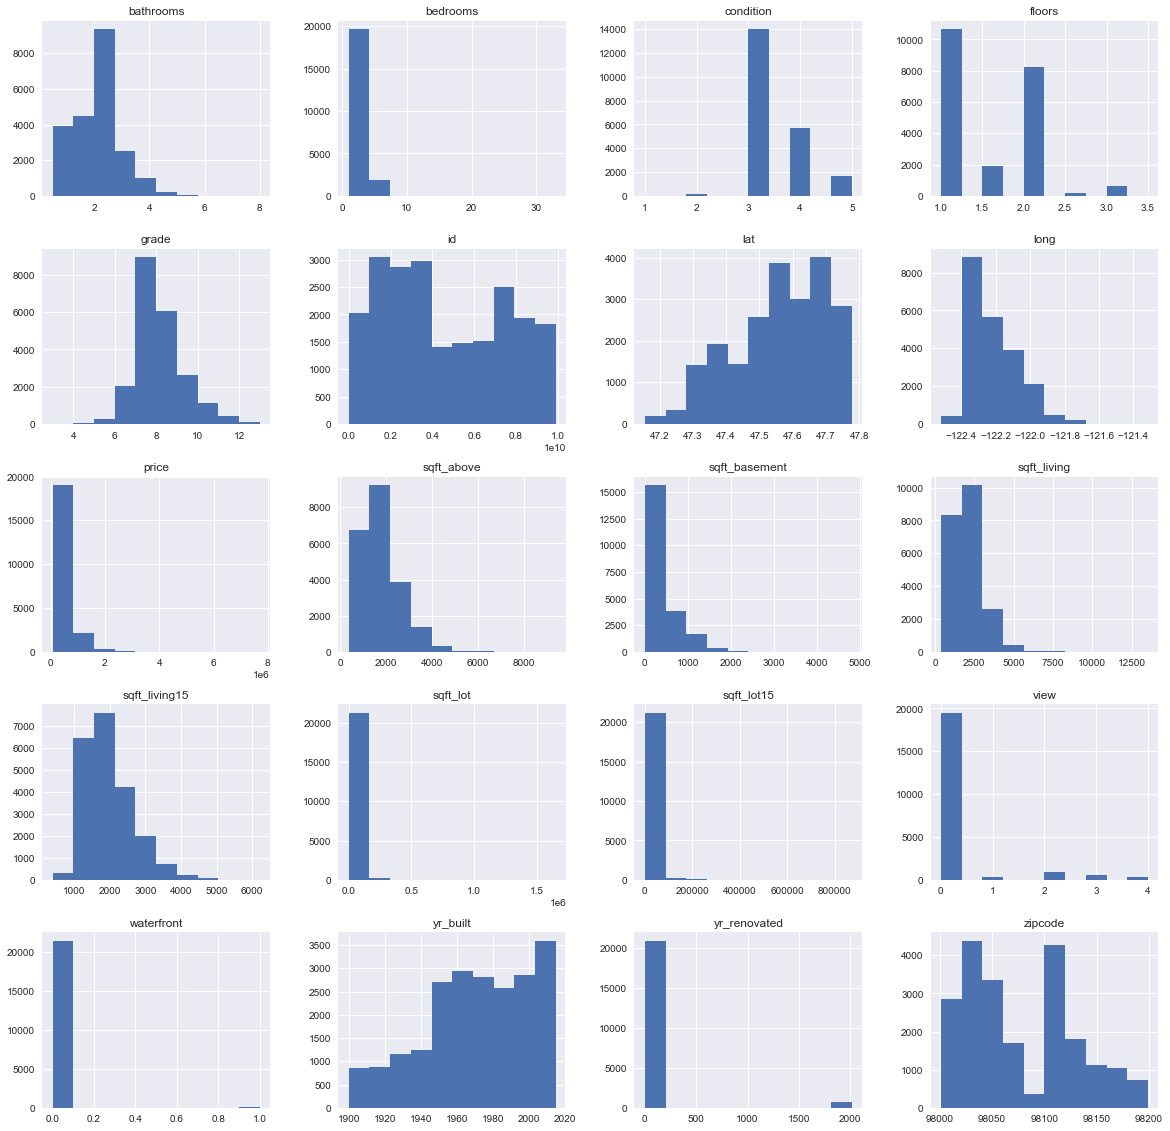

In [20]:
#look at distributions of each column
df.hist(figsize=(20,20));

## Drop Unnecessary Columns

In [21]:
drop_vars = ['id', 'date', 'zipcode']
df.drop(columns=drop_vars, axis=1, inplace=True)
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,3,7,1180,0.0,1955,0.0,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,1991.0,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933,0.0,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,0.0,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,0.0,47.6168,-122.045,1800,7503


## Removing Outliers

In [22]:
# after looking over the data, major outliers were only found in the bathrooms and bedrooms columns

### Dependant Variable - Price

In [23]:
from numpy import mean
from numpy import std

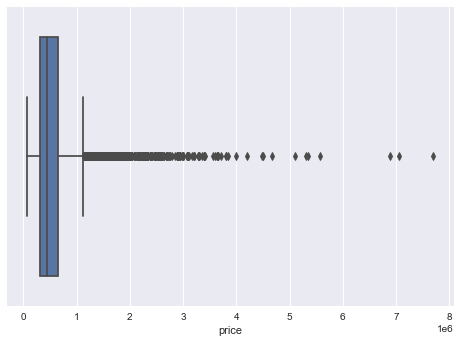

In [24]:
sns.boxplot(x=df['price'])

In [25]:
# calculate summary statistics
data_mean, data_std = mean(df.price), std(df.price)
# identify outliers
cut_off = data_std * 3
lower, upper = data_mean - cut_off, data_mean + cut_off

In [26]:
# identify outliers
outliers = [x for x in df.price if x < lower or x > upper]

In [27]:
sorted(outliers)

[1650000.0,
 1650000.0,
 1650000.0,
 1650000.0,
 1650000.0,
 1650000.0,
 1650000.0,
 1650000.0,
 1650000.0,
 1650000.0,
 1650000.0,
 1650000.0,
 1650000.0,
 1650000.0,
 1650000.0,
 1650000.0,
 1660000.0,
 1660000.0,
 1660000.0,
 1660000.0,
 1670000.0,
 1670000.0,
 1680000.0,
 1680000.0,
 1680000.0,
 1680000.0,
 1680000.0,
 1680000.0,
 1680000.0,
 1680000.0,
 1680000.0,
 1680000.0,
 1680000.0,
 1680000.0,
 1680000.0,
 1690000.0,
 1690000.0,
 1690000.0,
 1690000.0,
 1690000.0,
 1700000.0,
 1700000.0,
 1700000.0,
 1700000.0,
 1700000.0,
 1700000.0,
 1700000.0,
 1700000.0,
 1700000.0,
 1700000.0,
 1700000.0,
 1700000.0,
 1700000.0,
 1700000.0,
 1700000.0,
 1700000.0,
 1700000.0,
 1700000.0,
 1700000.0,
 1700000.0,
 1700000.0,
 1710000.0,
 1710000.0,
 1710000.0,
 1710000.0,
 1710000.0,
 1720000.0,
 1720000.0,
 1720000.0,
 1730000.0,
 1730000.0,
 1730000.0,
 1730000.0,
 1740000.0,
 1740000.0,
 1740000.0,
 1740000.0,
 1740000.0,
 1740000.0,
 1740000.0,
 1750000.0,
 1750000.0,
 1750000.0,
 175

In [28]:
#subset price to eliminate outliers 
df = df[df.price < 1650000]

### Number of Bedrooms

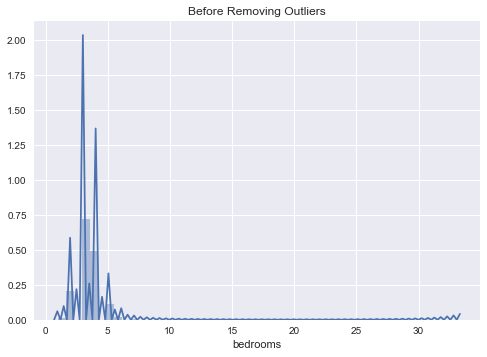

In [29]:
# identify outliers
plt.title('Before Removing Outliers')
sns.distplot(df['bedrooms'])
plt.show();

In [30]:
# remove outliers
count = 0
bed_outliers = []
mean = np.mean(df['bedrooms'])
max_distance = np.std(df['bedrooms']) * 2

for idx, row in df['bedrooms'].T.iteritems():
    if abs(row-mean) >= max_distance:
        count += 1
        df.drop(idx,inplace=True)
count

500

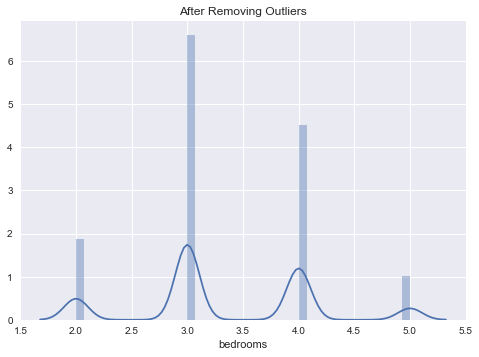

In [31]:
plt.title('After Removing Outliers')
sns.distplot(df['bedrooms'])
plt.show();

### Number of Bathrooms

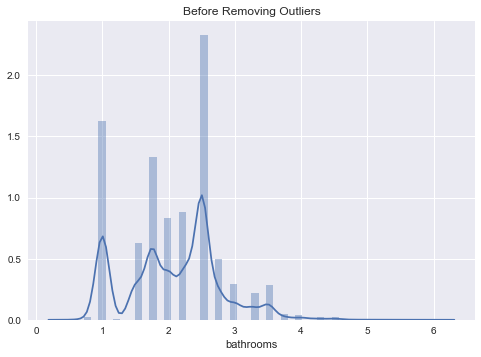

In [32]:
# identify outliers
plt.title('Before Removing Outliers')
sns.distplot(df['bathrooms'])
plt.show();

In [33]:
# remove outliers
count = 0
bath_outliers = []
mean = np.mean(df['bathrooms'])
max_distance = np.std(df['bathrooms']) * 3

for idx, row in df['bathrooms'].T.iteritems():
    if abs(row-mean) >= max_distance:
        count += 1
        df.drop(idx, inplace=True)
count

116

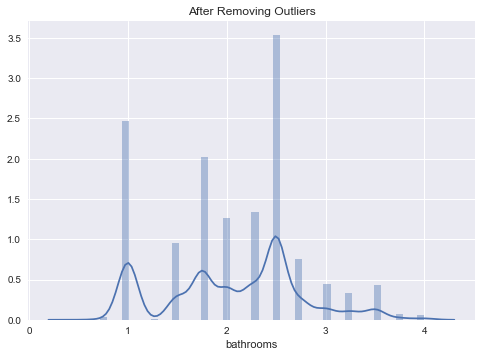

In [34]:
plt.title('After Removing Outliers')
sns.distplot(df['bathrooms'])
plt.show();

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20575 entries, 0 to 21596
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          20575 non-null  float64
 1   bedrooms       20575 non-null  int64  
 2   bathrooms      20575 non-null  float64
 3   sqft_living    20575 non-null  int64  
 4   sqft_lot       20575 non-null  int64  
 5   floors         20575 non-null  float64
 6   waterfront     20575 non-null  float64
 7   view           20575 non-null  float64
 8   condition      20575 non-null  int64  
 9   grade          20575 non-null  int64  
 10  sqft_above     20575 non-null  int64  
 11  sqft_basement  20575 non-null  float64
 12  yr_built       20575 non-null  int64  
 13  yr_renovated   20575 non-null  float64
 14  lat            20575 non-null  float64
 15  long           20575 non-null  float64
 16  sqft_living15  20575 non-null  int64  
 17  sqft_lot15     20575 non-null  int64  
dtypes: flo

In [36]:
# sqft_living equals sqft_above and sqft_basement so we will drop those columns
df = df.drop(['sqft_above', 'sqft_basement'], axis=1)
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
count,2.057500e+04,20575.000000,20575.000000,20575.000000,2.057500e+04,20575.000000,20575.000000,20575.000000,20575.000000,20575.000000,20575.000000,20575.00000,20575.000000,20575.000000,20575.000000,20575.000000
mean,5.032192e+05,3.328214,2.069198,2013.433779,1.461767e+04,1.485808,0.003548,0.198299,3.409964,7.602187,1971.208360,62.95723,47.558466,-122.213263,1955.139392,12470.051081
std,2.542688e+05,0.792713,0.695657,797.847588,3.978013e+04,0.538444,0.059461,0.693571,0.648144,1.083984,29.120007,348.86553,0.139974,0.141285,644.562423,26180.408925
min,7.800000e+04,2.000000,0.500000,440.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,4.000000,1900.000000,0.00000,47.155900,-122.519000,399.000000,651.000000
25%,3.200000e+05,3.000000,1.500000,1420.000000,5.002500e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1952.000000,0.00000,47.464800,-122.329000,1480.000000,5085.500000
50%,4.450000e+05,3.000000,2.250000,1880.000000,7.555000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1975.000000,0.00000,47.569500,-122.229000,1820.000000,7573.000000
75%,6.250000e+05,4.000000,2.500000,2480.000000,1.042600e+04,2.000000,0.000000,0.000000,4.000000,8.000000,1996.000000,0.00000,47.679000,-122.123000,2320.000000,9977.500000
max,1.640000e+06,5.000000,4.000000,7350.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,12.000000,2015.000000,2015.00000,47.777600,-121.315000,5790.000000,871200.000000


# Linear Regression

## Model 1

In [37]:
# import libraries
import scipy.stats as stats
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn import datasets, linear_model

In [38]:
outcome = 'price'
x_cols = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 
          'yr_built', 'yr_renovated', 'lat', 'long', 'sqft_living15', 'sqft_lot15']
predictors = '+'.join(x_cols)
f = outcome + '~' + predictors
model1 = smf.ols(formula=f, data=df).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.651
Model:                            OLS   Adj. R-squared:                  0.651
Method:                 Least Squares   F-statistic:                     2950.
Date:                Sun, 20 Dec 2020   Prob (F-statistic):               0.00
Time:                        21:51:42   Log-Likelihood:            -2.7444e+05
No. Observations:               20575   AIC:                         5.489e+05
Df Residuals:                   20561   BIC:                         5.490e+05
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -3.738e+07   1.15e+06    -32.382      0.000   -3.96e+07   -3.51e+07
bedrooms      -2.512e+04   1685.850    -14.902      0.000   -2.84e+04   -2.18e+04
bathrooms      4.337e+04   2567.730     16.891      0.000    3.83e+04    4.84e+04
sqft_living     142.5258      2.616     54.482      0.000     137.398     147.653
sqft_lot          0.2045      0.038      5.450      0.000       0.131       0.278
floors         4.445e+04   2426.332     18.322      0.000    3.97e+04    4.92e+04
waterfront     1.956e+05   1.86e+04     10.542      0.000    1.59e+05    2.32e+05
view           4.499e+04   1678.960     26.796      0.000    4.17e+04    4.83e+04
yr_built      -1702.8258     51.798    -32.875      0.000   -1804.353   -1601.299
yr_renovated     18.0971      3.128      5.786      0.000      11.966      24.228
lat            5.914e+05   7782.276     75.999      0.000    5.76e+05    6.07e+05
long          -1.028e+05   8826.581    -11.646      0.000    -1.2e+05   -8.55e+04
sqft_living15    93.4235      2.606     35.852      0.000      88.316      98.531
sqft_lot15       -0.2309      0.058     -4.010      0.000      -0.344      -0.118
==============================================================================
Omnibus:                     4602.347   Durbin-Watson:                   1.979
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            16599.948
Skew:                           1.097   Prob(JB):                         0.00
Kurtosis:                       6.814   Cond. No.                     5.35e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.35e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<ipython-input-39-5b3721209eff>:6: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


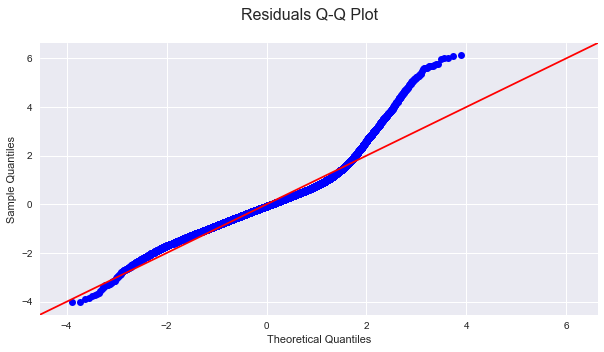

In [39]:
# qq plot
residuals = model1.resid
fig = sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)
fig.suptitle('Residuals Q-Q Plot', fontsize=16)
fig.set_size_inches(10,5)
fig.show()

In [40]:
# also check that the mean of the residuals is approx. 0.
mean_residuals = sum(model1.resid)/ len(model1.resid)
print("The mean of the residuals is {:.4}".format(mean_residuals))

The mean of the residuals is -9.547e-08


## Location Variables

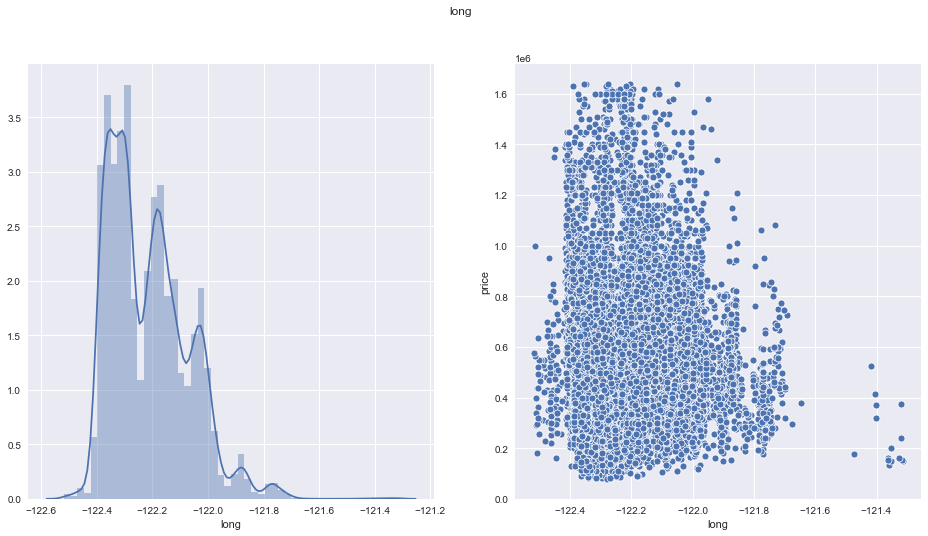

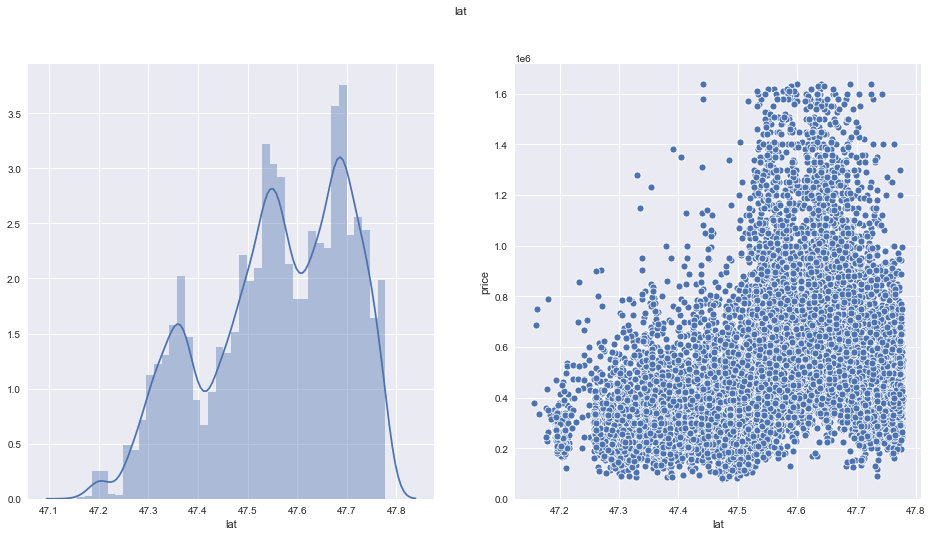

In [41]:
target = df['price'].copy()
location = df[['long', 'lat']].copy()

for col in location:
    x = location[col]
    y = target

    plt.figure(figsize=(16,8))
    plt.subplot(1,2,1)
    sns.distplot(x)
    plt.subplot(1,2,2)

    sns.scatterplot(x, y)
    plt.suptitle(col)
    plt.tight_layout
    plt.savefig(col + '.png')

In [42]:
location.head()

,long,lat
0,-122.257,47.5112
1,-122.319,47.7210
2,-122.233,47.7379
3,-122.393,47.5208
4,-122.045,47.6168


In [43]:
location['long_lat'] = list(zip(location['long'], location['lat']))
location.head()

,long,lat,long_lat
0,-122.257,47.5112,"(-122.257, 47.5112)"
1,-122.319,47.7210,"(-122.319, 47.721000000000004)"
2,-122.233,47.7379,"(-122.23299999999999, 47.7379)"
3,-122.393,47.5208,"(-122.39299999999999, 47.5208)"
4,-122.045,47.6168,"(-122.045, 47.6168)"


In [44]:
# calculate distance from point A to Seattle using haversine
from math import radians, cos, sin, asin, sqrt

def haversine(list_long_lat, other=[-122.336283, 47.609395]):

    lon1, lat1 = list_long_lat[0], list_long_lat[1]
    lon2, lat2 = other[0], other[1]
    # convert decimal degrees to radians 
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])
    # haversine formula 
    dlon = lon2 - lon1 
    dlat = lat2 - lat1 
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * asin(sqrt(a)) 
    # radius of earth in kilometers is 6371
    km = 6371 * c
    return km

In [45]:
location['dist_to_seattle'] = location['long_lat'].apply(haversine)

In [46]:
# add bellevue to locations
location['dist_to_bellevue'] = location['long_lat'].apply(haversine, other=[-122.198985, 47.615577])

In [47]:
feat_engineer = location.loc[:,['dist_to_seattle', 'dist_to_bellevue']]

In [48]:
feat_engineer.head()

,dist_to_seattle,dist_to_bellevue
0,12.434278,12.395639
1,12.477217,14.770934
2,16.247460,13.838051
3,10.731122,17.970486
4,21.850148,11.542868


In [49]:
# drop the original lat and long columns and join the feature engineered columns
df.drop(['lat', 'long'], axis=1)
df['dist_to_seattle'] = feat_engineer['dist_to_seattle']
df['dist_to_bellevue'] = feat_engineer['dist_to_bellevue']
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,dist_to_seattle,dist_to_bellevue
count,2.057500e+04,20575.000000,20575.000000,20575.000000,2.057500e+04,20575.000000,20575.000000,20575.000000,20575.000000,20575.000000,20575.000000,20575.00000,20575.000000,20575.000000,20575.000000,20575.000000,20575.000000,20575.000000
mean,5.032192e+05,3.328214,2.069198,2013.433779,1.461767e+04,1.485808,0.003548,0.198299,3.409964,7.602187,1971.208360,62.95723,47.558466,-122.213263,1955.139392,12470.051081,18.845929,17.625678
std,2.542688e+05,0.792713,0.695657,797.847588,3.978013e+04,0.538444,0.059461,0.693571,0.648144,1.083984,29.120007,348.86553,0.139974,0.141285,644.562423,26180.408925,10.800305,9.237418
min,7.800000e+04,2.000000,0.500000,440.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,4.000000,1900.000000,0.00000,47.155900,-122.519000,399.000000,651.000000,1.355938,0.640900
25%,3.200000e+05,3.000000,1.500000,1420.000000,5.002500e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1952.000000,0.00000,47.464800,-122.329000,1480.000000,5085.500000,9.915731,11.512126
50%,4.450000e+05,3.000000,2.250000,1880.000000,7.555000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1975.000000,0.00000,47.569500,-122.229000,1820.000000,7573.000000,16.890883,15.406481
75%,6.250000e+05,4.000000,2.500000,2480.000000,1.042600e+04,2.000000,0.000000,0.000000,4.000000,8.000000,1996.000000,0.00000,47.679000,-122.123000,2320.000000,9977.500000,25.779344,21.739393
max,1.640000e+06,5.000000,4.000000,7350.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,12.000000,2015.000000,2015.00000,47.777600,-121.315000,5790.000000,871200.000000,77.319065,67.048043


## Dealing with Categorical Features

In [50]:
# creating column "class_scale" based on condition of price
df.loc[df['price'] > 750000, 'class_scale'] = "upper"
df.loc[(df['price'] < 750000) & (df['price'] > 350000), 'class_scale'] = "middle"
df.loc[df['price'] < 350000, 'class_scale'] = "lower"

In [51]:
grouped = df.groupby(['class_scale'])['price', 'grade'].agg(['mean','min', 'max', 'std']).round()
grouped.head()

<ipython-input-51-2c9d313e0316>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  grouped = df.groupby(['class_scale'])['price', 'grade'].agg(['mean','min', 'max', 'std']).round()


price                                grade             
                 mean       min        max       std  mean min max  std
class_scale                                                            
lower        267476.0   78000.0   349990.0   53841.0   7.0   4   9  1.0
middle       512688.0  350500.0   749999.0  107673.0   8.0   4  11  1.0
upper        980621.0  750500.0  1640000.0  215827.0   9.0   5  12  1.0

In [52]:
df.class_scale.value_counts(normalize=True)

middle    0.536437
lower     0.317128
upper     0.146435
Name: class_scale, dtype: float64

In [53]:
grade_dummies = pd.get_dummies(df['grade'], prefix='gr', drop_first=True)
condition_dummies = pd.get_dummies(df['condition'], prefix='condit', drop_first=True)
class_dummies = pd.get_dummies(df['class_scale'], prefix='class', drop_first=True)

In [54]:
df = df.drop(['grade', 'condition', 'class_scale'], axis=1)
df = pd.concat([df, grade_dummies, condition_dummies, class_dummies], axis = 1)
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,yr_built,yr_renovated,...,gr_9,gr_10,gr_11,gr_12,condit_2,condit_3,condit_4,condit_5,class_middle,class_upper
0,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,1955,0.0,...,0,0,0,0,0,1,0,0,0,0
1,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,1951,1991.0,...,0,0,0,0,0,1,0,0,1,0
2,180000.0,2,1.00,770,10000,1.0,0.0,0.0,1933,0.0,...,0,0,0,0,0,1,0,0,0,0
3,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,1965,0.0,...,0,0,0,0,0,0,0,1,1,0
4,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,1987,0.0,...,0,0,0,0,0,1,0,0,1,0


In [55]:
drop_cols = ['waterfront','view','yr_renovated']
df.drop(drop_cols, axis=1)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,yr_built,lat,long,sqft_living15,...,gr_9,gr_10,gr_11,gr_12,condit_2,condit_3,condit_4,condit_5,class_middle,class_upper
0,221900.0,3,1.00,1180,5650,1.0,1955,47.5112,-122.257,1340,...,0,0,0,0,0,1,0,0,0,0
1,538000.0,3,2.25,2570,7242,2.0,1951,47.7210,-122.319,1690,...,0,0,0,0,0,1,0,0,1,0
2,180000.0,2,1.00,770,10000,1.0,1933,47.7379,-122.233,2720,...,0,0,0,0,0,1,0,0,0,0
3,604000.0,4,3.00,1960,5000,1.0,1965,47.5208,-122.393,1360,...,0,0,0,0,0,0,0,1,1,0
4,510000.0,3,2.00,1680,8080,1.0,1987,47.6168,-122.045,1800,...,0,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,360000.0,3,2.50,1530,1131,3.0,2009,47.6993,-122.346,1530,...,0,0,0,0,0,1,0,0,1,0
21593,400000.0,4,2.50,2310,5813,2.0,2014,47.5107,-122.362,1830,...,0,0,0,0,0,1,0,0,1,0
21594,402101.0,2,0.75,1020,1350,2.0,2009,47.5944,-122.299,1020,...,0,0,0,0,0,1,0,0,1,0
21595,400000.0,3,2.50,1600,2388,2.0,2004,47.5345,-122.069,1410,...,0,0,0,0,0,1,0,0,1,0


## Model 2

In [56]:
#Greatly increased our r-squared by incorporating our categorical features through one-hot encoding:
#    - Distance to cities (Seattle and Bellevue)
#    - Condition (1 - 5 scale)
#    - Grade (3 - 13 scale)
#    - Class (upper, middle, lower)

In [57]:
# try the model with the new columns
outcome = 'price'
x_cols = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 
          'yr_built', 'yr_renovated', 'dist_to_seattle', 'dist_to_bellevue', 'sqft_living15', 'sqft_lot15', 'gr_5', 'gr_6', 'gr_7', 'gr_8',
       'gr_9', 'gr_10', 'gr_11', 'gr_12', 'condit_2', 'condit_3',
       'condit_4', 'condit_5', 'class_middle', 'class_upper']
predictors = '+'.join(x_cols)
f = outcome + '~' + predictors
model2 = smf.ols(formula=f, data=df).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                     4288.
Date:                Sun, 20 Dec 2020   Prob (F-statistic):               0.00
Time:                        21:51:48   Log-Likelihood:            -2.6581e+05
No. Observations:               20575   AIC:                         5.317e+05
Df Residuals:                   20547   BIC:                         5.319e+05
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         1.751e+06   8.18e+04     21.395      0.000    1.59e+06    1.91e+06
bedrooms         -8449.0333   1133.305     -7.455      0.000   -1.07e+04   -6227.665
bathrooms         1.896e+04   1727.122     10.979      0.000    1.56e+04    2.23e+04
sqft_living         46.9081      1.891     24.812      0.000      43.203      50.614
sqft_lot             0.1212      0.025      4.895      0.000       0.073       0.170
floors            1.342e+04   1681.101      7.984      0.000    1.01e+04    1.67e+04
waterfront        1.441e+05   1.22e+04     11.797      0.000     1.2e+05    1.68e+05
view              2.267e+04   1119.989     20.241      0.000    2.05e+04    2.49e+04
yr_built          -808.9788     39.741    -20.356      0.000    -886.875    -731.082
yr_renovated         8.7922      2.096      4.195      0.000       4.684      12.901
dist_to_seattle  -1165.5983    150.136     -7.764      0.000   -1459.876    -871.321
dist_to_bellevue -3887.7247    163.303    -23.807      0.000   -4207.811   -3567.638
sqft_living15       19.3103      1.866     10.346      0.000      15.652      22.969
sqft_lot15           0.0682      0.038      1.794      0.073      -0.006       0.143
gr_5              1.606e+04   2.65e+04      0.607      0.544   -3.58e+04    6.79e+04
gr_6              3.231e+04   2.57e+04      1.259      0.208    -1.8e+04    8.26e+04
gr_7              7.247e+04   2.57e+04      2.825      0.005    2.22e+04    1.23e+05
gr_8              1.087e+05   2.57e+04      4.221      0.000    5.82e+04    1.59e+05
gr_9              1.572e+05   2.59e+04      6.071      0.000    1.06e+05    2.08e+05
gr_10             1.949e+05   2.61e+04      7.459      0.000    1.44e+05    2.46e+05
gr_11             2.815e+05   2.69e+04     10.471      0.000    2.29e+05    3.34e+05
gr_12             4.691e+05   3.29e+04     14.268      0.000    4.05e+05    5.34e+05
condit_2          4631.3538   2.18e+04      0.213      0.831    -3.8e+04    4.73e+04
condit_3          3.132e+04   2.04e+04      1.538      0.124   -8602.156    7.12e+04
condit_4          4.599e+04   2.04e+04      2.257      0.024    6056.676    8.59e+04
condit_5          6.515e+04   2.05e+04      3.181      0.001     2.5e+04    1.05e+05
class_middle      1.296e+05   1973.648     65.680      0.000    1.26e+05    1.33e+05
class_upper       4.319e+05   3491.037    123.718      0.000    4.25e+05    4.39e+05
==============================================================================
Omnibus:                     5033.456   Durbin-Watson:                   1.994
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            21500.349
Skew:                           1.145   Prob(JB):                         0.00
Kurtosis:                       7.453   Cond. No.                     6.18e+06
=====================================================

<ipython-input-58-370b3596e1db>:6: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


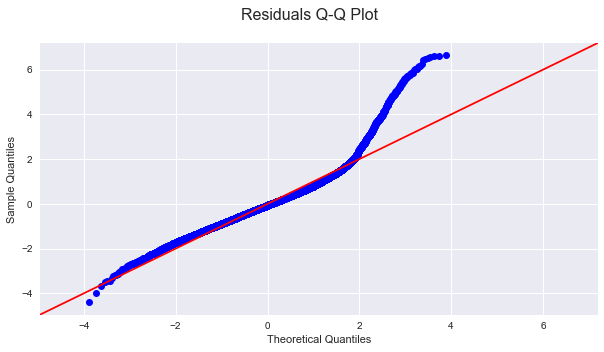

In [58]:
# qq plot
residuals = model2.resid
fig = sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)
fig.suptitle('Residuals Q-Q Plot', fontsize=16)
fig.set_size_inches(10,5)
fig.show()

In [59]:
# also check that the mean of the residuals is approx. 0.
mean_residuals = sum(model2.resid)/ len(model2.resid)
print("The mean of the residuals is {:.4}".format(mean_residuals))

The mean of the residuals is 1.023e-07


## Checking Assumptions

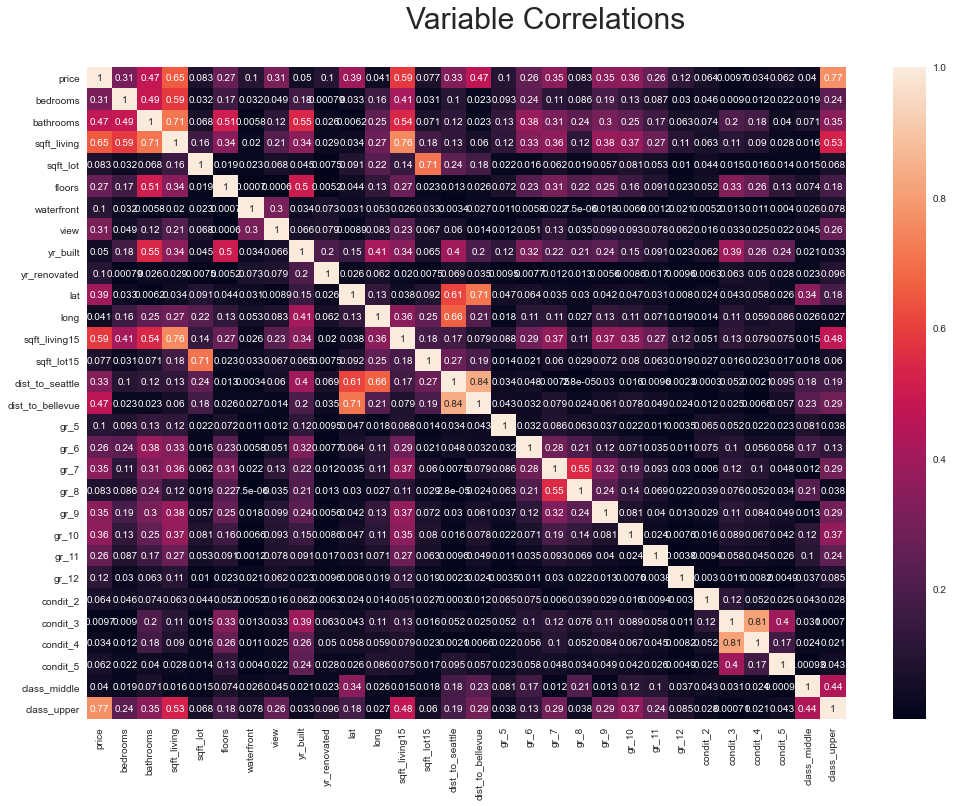

In [60]:
corr = df.corr().abs()
fig, ax=plt.subplots(figsize=(17,12))
fig.suptitle('Variable Correlations', fontsize=30, y=.95)
heatmap = sns.heatmap(corr, annot=True)
heatmap

In [61]:
# the heatmap does not provide much
# create functions to find any multicollinearity issues
# find the columns with the most correlations to the dependant variable
features = []
correlations = []
for idx, correlation in corr['price'].T.iteritems():
    if correlation >= .30 and idx != 'price':
        features.append(idx)
        correlations.append(correlation)
corr_price_df = pd.DataFrame({'Correlations':correlations, 'Features': features}).sort_values(by=['Correlations'], ascending=False)

In [62]:
# usually any variables that correlate more than 80% have multicollinearity
# one of those columns will need to be dropped
multicollinear_features = []
multicollinear_corr = []
def check_multicollinearity(feature):
    for idx, correlation in corr[feature].T.iteritems():
        if correlation >= .80 and idx != feature:
            multicollinear_features.append([feature, idx])
            multicollinear_corr.append(correlation)
            
for feature in corr:
    check_multicollinearity(feature)
MC_df = pd.DataFrame({'Correlations':multicollinear_corr, 'Features': multicollinear_features})
print('Multicollinear Features')
display(MC_df)

Multicollinear Features


,Correlations,Features
0,0.838626,"[dist_to_seattle, dist_to_bellevue]"
1,0.838626,"[dist_to_bellevue, dist_to_seattle]"
2,0.814784,"[condit_3, condit_4]"
3,0.814784,"[condit_4, condit_3]"


In [63]:
print('Correlations with Price')
display(corr_price_df)

Correlations with Price


,Correlations,Features
11,0.772101,class_upper
2,0.654346,sqft_living
5,0.587008,sqft_living15
1,0.474375,bathrooms
7,0.466524,dist_to_bellevue
4,0.391844,lat
10,0.360305,gr_10
8,0.347787,gr_7
9,0.346247,gr_9
6,0.325144,dist_to_seattle


## Create Interactions

In [64]:
# this increased the r-squared slightly

In [65]:
df['interaction_dist'] = df['dist_to_bellevue'] * df['dist_to_seattle']
df['interaction_bb'] = df['bathrooms'] * df['bedrooms']

## Model 3

In [66]:
outcome = 'price'
x_cols = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 
          'yr_built', 'yr_renovated', 'dist_to_seattle', 'dist_to_bellevue', 'sqft_living15', 'sqft_lot15', 'gr_5', 'gr_6', 'gr_7', 'gr_8',
       'gr_9', 'gr_10', 'gr_11', 'gr_12', 'condit_2', 'condit_3',
       'condit_4', 'condit_5', 'class_middle', 'class_upper']
predictors = '+'.join(x_cols)
f = outcome + '~' + predictors
model3 = smf.ols(formula=f, data=df).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                     4288.
Date:                Sun, 20 Dec 2020   Prob (F-statistic):               0.00
Time:                        21:51:57   Log-Likelihood:            -2.6581e+05
No. Observations:               20575   AIC:                         5.317e+05
Df Residuals:                   20547   BIC:                         5.319e+05
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         1.751e+06   8.18e+04     21.395      0.000    1.59e+06    1.91e+06
bedrooms         -8449.0333   1133.305     -7.455      0.000   -1.07e+04   -6227.665
bathrooms         1.896e+04   1727.122     10.979      0.000    1.56e+04    2.23e+04
sqft_living         46.9081      1.891     24.812      0.000      43.203      50.614
sqft_lot             0.1212      0.025      4.895      0.000       0.073       0.170
floors            1.342e+04   1681.101      7.984      0.000    1.01e+04    1.67e+04
waterfront        1.441e+05   1.22e+04     11.797      0.000     1.2e+05    1.68e+05
view              2.267e+04   1119.989     20.241      0.000    2.05e+04    2.49e+04
yr_built          -808.9788     39.741    -20.356      0.000    -886.875    -731.082
yr_renovated         8.7922      2.096      4.195      0.000       4.684      12.901
dist_to_seattle  -1165.5983    150.136     -7.764      0.000   -1459.876    -871.321
dist_to_bellevue -3887.7247    163.303    -23.807      0.000   -4207.811   -3567.638
sqft_living15       19.3103      1.866     10.346      0.000      15.652      22.969
sqft_lot15           0.0682      0.038      1.794      0.073      -0.006       0.143
gr_5              1.606e+04   2.65e+04      0.607      0.544   -3.58e+04    6.79e+04
gr_6              3.231e+04   2.57e+04      1.259      0.208    -1.8e+04    8.26e+04
gr_7              7.247e+04   2.57e+04      2.825      0.005    2.22e+04    1.23e+05
gr_8              1.087e+05   2.57e+04      4.221      0.000    5.82e+04    1.59e+05
gr_9              1.572e+05   2.59e+04      6.071      0.000    1.06e+05    2.08e+05
gr_10             1.949e+05   2.61e+04      7.459      0.000    1.44e+05    2.46e+05
gr_11             2.815e+05   2.69e+04     10.471      0.000    2.29e+05    3.34e+05
gr_12             4.691e+05   3.29e+04     14.268      0.000    4.05e+05    5.34e+05
condit_2          4631.3538   2.18e+04      0.213      0.831    -3.8e+04    4.73e+04
condit_3          3.132e+04   2.04e+04      1.538      0.124   -8602.156    7.12e+04
condit_4          4.599e+04   2.04e+04      2.257      0.024    6056.676    8.59e+04
condit_5          6.515e+04   2.05e+04      3.181      0.001     2.5e+04    1.05e+05
class_middle      1.296e+05   1973.648     65.680      0.000    1.26e+05    1.33e+05
class_upper       4.319e+05   3491.037    123.718      0.000    4.25e+05    4.39e+05
==============================================================================
Omnibus:                     5033.456   Durbin-Watson:                   1.994
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            21500.349
Skew:                           1.145   Prob(JB):                         0.00
Kurtosis:                       7.453   Cond. No.                     6.18e+06
=====================================================

<ipython-input-67-fb0070ecdd81>:6: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


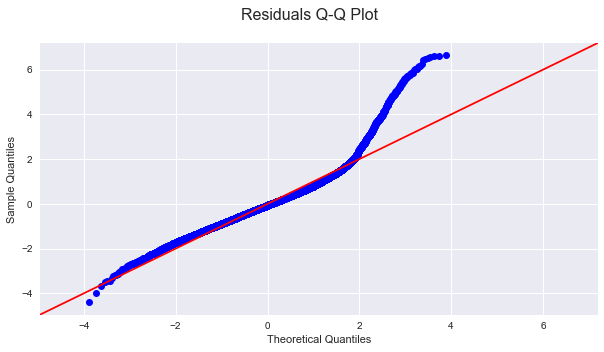

In [67]:
# qq plot
residuals = model3.resid
fig = sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)
fig.suptitle('Residuals Q-Q Plot', fontsize=16)
fig.set_size_inches(10,5)
fig.show()

In [68]:
# also check that the mean of the residuals is approx. 0.
mean_residuals = sum(model3.resid)/ len(model3.resid)
print("The mean of the residuals is {:.4}".format(mean_residuals))

The mean of the residuals is 1.023e-07


## Normalize Features

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20575 entries, 0 to 21596
Data columns (total 32 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   price             20575 non-null  float64
 1   bedrooms          20575 non-null  int64  
 2   bathrooms         20575 non-null  float64
 3   sqft_living       20575 non-null  int64  
 4   sqft_lot          20575 non-null  int64  
 5   floors            20575 non-null  float64
 6   waterfront        20575 non-null  float64
 7   view              20575 non-null  float64
 8   yr_built          20575 non-null  int64  
 9   yr_renovated      20575 non-null  float64
 10  lat               20575 non-null  float64
 11  long              20575 non-null  float64
 12  sqft_living15     20575 non-null  int64  
 13  sqft_lot15        20575 non-null  int64  
 14  dist_to_seattle   20575 non-null  float64
 15  dist_to_bellevue  20575 non-null  float64
 16  gr_5              20575 non-null  uint8 

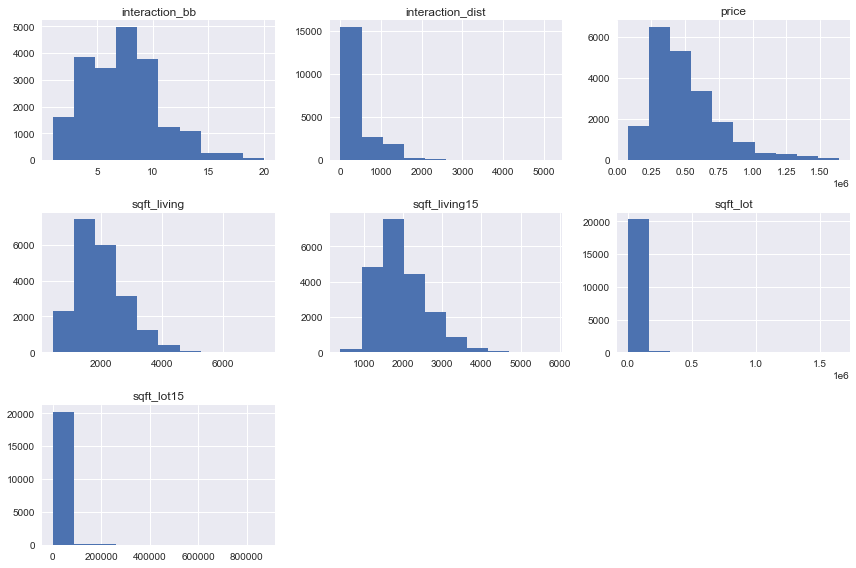

In [70]:
df[['price', 'sqft_living','sqft_living15','sqft_lot', 'sqft_lot15', 'interaction_dist','interaction_bb']].hist(figsize=(12, 8))
plt.tight_layout()

In [71]:
from sklearn.preprocessing import QuantileTransformer
qt = QuantileTransformer(output_distribution='normal')
df['qt_price'] = qt.fit_transform(df[['price']])
df['qt_sqft_living'] = qt.fit_transform(df[['sqft_living']])
df['qt_sqft_living15'] = qt.fit_transform(df[['sqft_living15']])
df['qt_sqft_lot'] = qt.fit_transform(df[['sqft_lot']])
df['qt_sqft_lot15'] = qt.fit_transform(df[['sqft_lot15']])
df['qt_interaction_dist'] = qt.fit_transform(df[['interaction_dist']])
df['qt_interaction_bb'] = qt.fit_transform(df[['interaction_bb']])

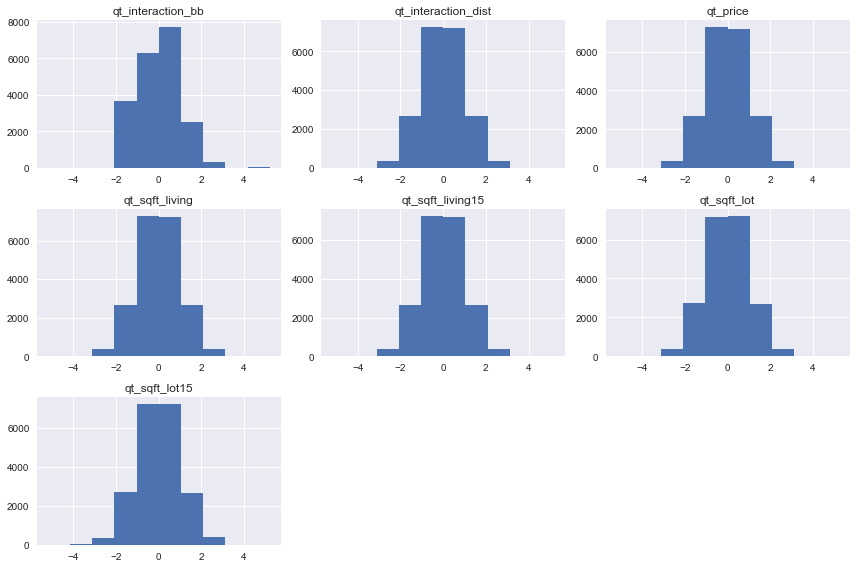

In [72]:
df[['qt_price', 'qt_sqft_living','qt_sqft_living15','qt_sqft_lot', 'qt_sqft_lot15', 'qt_interaction_dist','qt_interaction_bb']].hist(figsize=(12, 8))
plt.tight_layout()

## Model 4

In [73]:
outcome = 'price'
x_cols = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 
          'yr_built', 'yr_renovated', 'dist_to_seattle', 'dist_to_bellevue', 'sqft_living15', 'sqft_lot15', 'gr_5', 'gr_6', 'gr_7', 'gr_8',
       'gr_9', 'gr_10', 'gr_11', 'gr_12', 'condit_2', 'condit_3',
       'condit_4', 'condit_5', 'class_middle', 'class_upper']
predictors = '+'.join(x_cols)
f = outcome + '~' + predictors
model4 = smf.ols(formula=f, data=df).fit()
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                     4288.
Date:                Sun, 20 Dec 2020   Prob (F-statistic):               0.00
Time:                        21:52:02   Log-Likelihood:            -2.6581e+05
No. Observations:               20575   AIC:                         5.317e+05
Df Residuals:                   20547   BIC:                         5.319e+05
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         1.751e+06   8.18e+04     21.395      0.000    1.59e+06    1.91e+06
bedrooms         -8449.0333   1133.305     -7.455      0.000   -1.07e+04   -6227.665
bathrooms         1.896e+04   1727.122     10.979      0.000    1.56e+04    2.23e+04
sqft_living         46.9081      1.891     24.812      0.000      43.203      50.614
sqft_lot             0.1212      0.025      4.895      0.000       0.073       0.170
floors            1.342e+04   1681.101      7.984      0.000    1.01e+04    1.67e+04
waterfront        1.441e+05   1.22e+04     11.797      0.000     1.2e+05    1.68e+05
view              2.267e+04   1119.989     20.241      0.000    2.05e+04    2.49e+04
yr_built          -808.9788     39.741    -20.356      0.000    -886.875    -731.082
yr_renovated         8.7922      2.096      4.195      0.000       4.684      12.901
dist_to_seattle  -1165.5983    150.136     -7.764      0.000   -1459.876    -871.321
dist_to_bellevue -3887.7247    163.303    -23.807      0.000   -4207.811   -3567.638
sqft_living15       19.3103      1.866     10.346      0.000      15.652      22.969
sqft_lot15           0.0682      0.038      1.794      0.073      -0.006       0.143
gr_5              1.606e+04   2.65e+04      0.607      0.544   -3.58e+04    6.79e+04
gr_6              3.231e+04   2.57e+04      1.259      0.208    -1.8e+04    8.26e+04
gr_7              7.247e+04   2.57e+04      2.825      0.005    2.22e+04    1.23e+05
gr_8              1.087e+05   2.57e+04      4.221      0.000    5.82e+04    1.59e+05
gr_9              1.572e+05   2.59e+04      6.071      0.000    1.06e+05    2.08e+05
gr_10             1.949e+05   2.61e+04      7.459      0.000    1.44e+05    2.46e+05
gr_11             2.815e+05   2.69e+04     10.471      0.000    2.29e+05    3.34e+05
gr_12             4.691e+05   3.29e+04     14.268      0.000    4.05e+05    5.34e+05
condit_2          4631.3538   2.18e+04      0.213      0.831    -3.8e+04    4.73e+04
condit_3          3.132e+04   2.04e+04      1.538      0.124   -8602.156    7.12e+04
condit_4          4.599e+04   2.04e+04      2.257      0.024    6056.676    8.59e+04
condit_5          6.515e+04   2.05e+04      3.181      0.001     2.5e+04    1.05e+05
class_middle      1.296e+05   1973.648     65.680      0.000    1.26e+05    1.33e+05
class_upper       4.319e+05   3491.037    123.718      0.000    4.25e+05    4.39e+05
==============================================================================
Omnibus:                     5033.456   Durbin-Watson:                   1.994
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            21500.349
Skew:                           1.145   Prob(JB):                         0.00
Kurtosis:                       7.453   Cond. No.                     6.18e+06
=====================================================

<ipython-input-74-d35a816d5623>:6: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


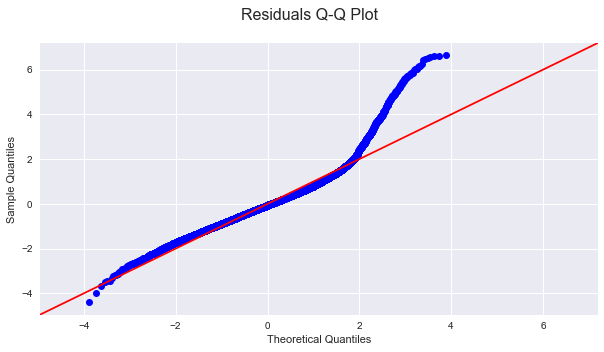

In [74]:
# qq plot
residuals = model4.resid
fig = sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)
fig.suptitle('Residuals Q-Q Plot', fontsize=16)
fig.set_size_inches(10,5)
fig.show()

In [75]:
# also check that the mean of the residuals is approx. 0.
mean_residuals = sum(model4.resid)/ len(model4.resid)
print("The mean of the residuals is {:.4}".format(mean_residuals))

The mean of the residuals is 1.023e-07


## Model 5

In [76]:
# drop sqft_lot15, gr_5, gr_6, condit_2 and condit_3
outcome = 'price'
x_cols = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 
          'yr_built', 'yr_renovated', 'dist_to_seattle', 'dist_to_bellevue', 'sqft_living15', 'gr_7', 'gr_8',
          'gr_9', 'gr_10', 'gr_11', 'gr_12', 'condit_2', 'condit_3','class_middle', 'class_upper']
predictors = '+'.join(x_cols)
f = outcome + '~' + predictors
model5 = smf.ols(formula=f, data=df).fit()
model5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                     5245.
Date:                Sun, 20 Dec 2020   Prob (F-statistic):               0.00
Time:                        21:52:02   Log-Likelihood:            -2.6584e+05
No. Observations:               20575   AIC:                         5.317e+05
Df Residuals:                   20552   BIC:                         5.319e+05
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         1.874e+06   7.56e+04     24.776      0.000    1.73e+06    2.02e+06
bedrooms         -8486.8094   1133.155     -7.490      0.000   -1.07e+04   -6265.736
bathrooms         1.996e+04   1720.683     11.602      0.000    1.66e+04    2.33e+04
sqft_living         47.3192      1.890     25.036      0.000      43.615      51.024
sqft_lot             0.1486      0.018      8.059      0.000       0.112       0.185
floors            1.329e+04   1682.062      7.903      0.000    9996.240    1.66e+04
waterfront        1.434e+05   1.22e+04     11.734      0.000    1.19e+05    1.67e+05
view               2.26e+04   1121.417     20.152      0.000    2.04e+04    2.48e+04
yr_built          -831.3312     39.447    -21.074      0.000    -908.651    -754.011
yr_renovated         8.2312      2.095      3.928      0.000       4.124      12.338
dist_to_seattle  -1176.1667    149.496     -7.868      0.000   -1469.191    -883.143
dist_to_bellevue -3861.1473    163.381    -23.633      0.000   -4181.387   -3540.908
sqft_living15       18.7712      1.864     10.070      0.000      15.118      22.425
gr_7              4.153e+04   2617.103     15.870      0.000    3.64e+04    4.67e+04
gr_8              7.737e+04   3248.568     23.817      0.000     7.1e+04    8.37e+04
gr_9              1.258e+05   4215.723     29.838      0.000    1.18e+05    1.34e+05
gr_10             1.631e+05   5477.876     29.780      0.000    1.52e+05    1.74e+05
gr_11             2.497e+05   8336.499     29.956      0.000    2.33e+05    2.66e+05
gr_12             4.376e+05   2.07e+04     21.143      0.000    3.97e+05    4.78e+05
condit_2           -4.6e+04   8056.532     -5.709      0.000   -6.18e+04   -3.02e+04
condit_3         -1.841e+04   1645.675    -11.184      0.000   -2.16e+04   -1.52e+04
class_middle      1.303e+05   1972.936     66.040      0.000    1.26e+05    1.34e+05
class_upper       4.331e+05   3492.100    124.024      0.000    4.26e+05     4.4e+05
==============================================================================
Omnibus:                     4972.094   Durbin-Watson:                   1.994
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            20887.216
Skew:                           1.136   Prob(JB):                         0.00
Kurtosis:                       7.382   Cond. No.                     4.65e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.65e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<ipython-input-77-109be0029dd2>:6: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


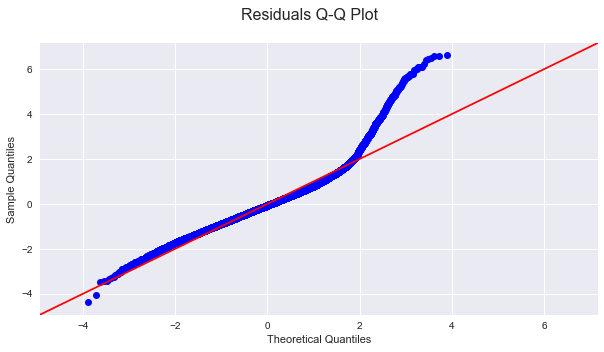

In [77]:
# qq plot
residuals = model5.resid
fig = sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)
fig.suptitle('Residuals Q-Q Plot', fontsize=16)
fig.set_size_inches(10,5)
fig.show()

In [78]:
# also check that the mean of the residuals is approx. 0.
mean_residuals = sum(model4.resid)/ len(model4.resid)
print("The mean of the residuals is {:.4}".format(mean_residuals))

The mean of the residuals is 1.023e-07
